# Housing Price Prediction

### Dataset Description
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

TotalBsmtSF: Total square feet of basement area

BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

Fireplaces: Number of fireplaces

PoolArea: Pool area in square feet

GarageCars: Size of garage in car capacity

WoodDeckSF: Wood deck area in square feet

ScreenPorch: Screen porch area in square feet

### import Data

In [2]:
#import libraries
import pandas as pd

In [3]:
url = '/Users/sadiakhanrupa/Bootcamp Main Phase/Chapter_7 Supervised_ML/Data/housing_iteration_0_2_classification/housing_iteration_0_2_classification.csv'
data = pd.read_csv(url)
data.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0


In [4]:
data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


In [6]:
data.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
Expensive         0
dtype: int64

### LotFrontage has some missing values

In [7]:
y = data.pop('Expensive')

y

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    1
1458    0
1459    0
Name: Expensive, Length: 1460, dtype: int64

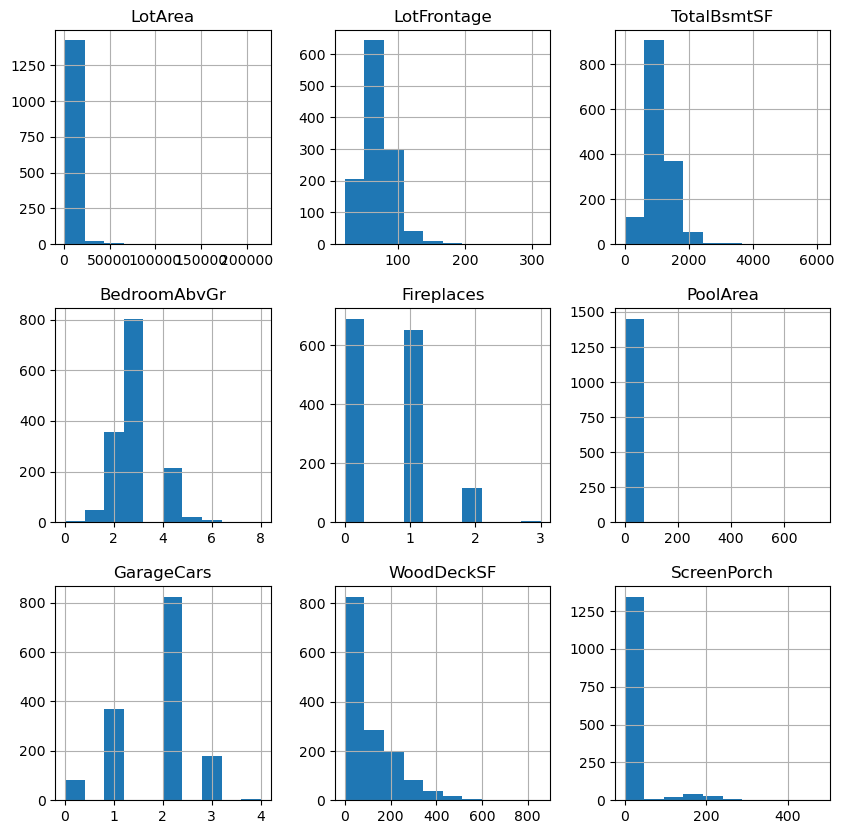

In [8]:
data.hist(figsize=(10,10));

In [9]:
X = data

## 3. Train-test split

Before performing a deeper exploration, we will split the dataset into 2 chunks: train and test. We will use the train set to find patterns in the data and create a model. The test set will remain untouched, unseen, unexplored. It will be the "reality check" for our model, it will let us know whether our model is able to generalize.

Here, we're using the function `train_test_split` to shuffle the observations randomly and create the train and test sets for both the `X` and the `y` objects at the same time, ensuring that they are shuffled the same way:

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42)

In [11]:
X_train

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
254,8400,70.0,1314,3,0,0,1,250,0
1066,7837,59.0,799,3,1,0,2,0,0
638,8777,67.0,796,2,0,0,0,328,0
799,7200,60.0,731,3,2,0,1,0,0
380,5000,50.0,1026,3,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1095,9317,78.0,1314,3,1,0,2,0,0
1130,7804,65.0,1122,4,2,0,2,431,0
1294,8172,60.0,864,2,0,0,2,0,0
860,7642,55.0,912,3,1,0,1,0,0


In [12]:
y_train

254     0
1066    0
638     0
799     0
380     0
       ..
1095    0
1130    0
1294    0
860     0
1126    0
Name: Expensive, Length: 1168, dtype: int64

In [13]:
X_test

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
892,8414,70.0,1059,3,0,0,1,192,0
1105,12256,98.0,1463,3,2,0,2,186,0
413,8960,56.0,1008,2,1,0,2,0,0
522,5000,50.0,1004,3,2,0,2,0,0
1036,12898,89.0,1620,2,1,0,3,228,0
...,...,...,...,...,...,...,...,...,...
479,5925,50.0,907,2,0,0,2,0,0
1361,16158,124.0,1530,3,1,0,2,168,0
802,8199,63.0,728,3,1,0,2,36,0
651,9084,60.0,755,4,1,0,1,120,0


In [14]:
y_test

892     0
1105    1
413     0
522     0
1036    1
       ..
479     0
1361    1
802     0
651     0
722     0
Name: Expensive, Length: 292, dtype: int64

## Iteration 0 - An intuition-based model

Machine Learning models should never be the first option to solve any problem. Machine Learning adds complexity to a business, and it should only be implemented if it represents a clear advantage compared to a simple working solution that the company has built following simple rules, common sense or gained expertise.

Therefore, the first step when solving any problem should be to create a simple (even dumb) working solution and learn to evaluate it. In our example: how well can we predict expanse with an extremely simple rule?

Let's start by suggesting that every house is not expensive

In [15]:
y_train.value_counts()

Expensive
0    999
1    169
Name: count, dtype: int64

In [16]:
len(y_train)

1168

our predictions for train set will be 1168 zeros
(in the dataset expensive means 1, not expensive 0)

In [17]:
pred_train_labels = pd.Series(0, index= range(1168))

Now: how good are those predictions? We will compare them with the true values and find out the percentage of correctly predicted houses. This metric is called **accuracy**:

In [18]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_train,
                                 y_pred = pred_train_labels
                                 )

round(train_accuracy, 2)


0.86

Okay, we have about a 86% accuracy in our train set. Let's find out how would have it done in our test set:

In [19]:
len(y_test)

292

In [20]:
pred_test_labels = pd.Series(0, index= range(292))

In [21]:
test_accuracy = accuracy_score(y_true = y_test,
                               y_pred = pred_test_labels)

In [24]:
test_accuracy.round(2)


0.84

In [26]:
X_train.value_counts('PoolArea')

PoolArea
0      1162
480       1
512       1
519       1
555       1
648       1
738       1
Name: count, dtype: int64

In [27]:
y_train.value_counts()

Expensive
0    999
1    169
Name: count, dtype: int64